In [9]:
import pandas as pd
import numpy as np

In [52]:
df = pd.read_csv(r"C:\Users\ponra\Downloads\Electric_Production.csv")

In [53]:
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [54]:
df.info()
m,n = df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [55]:
import warnings
warnings.filterwarnings("ignore")

In [56]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [59]:
ind = df.set_index(['DATE'])
ind.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


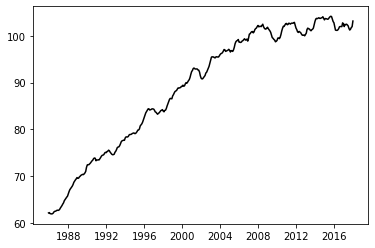

In [60]:
roll_mean = ind.rolling(window=12).mean()
roll_std = ind.rolling(window=12).std()

plt.plot(roll_mean,c='black')

In [62]:
ind = ind.dropna()
from statsmodels.tsa.stattools import adfuller
dtest = adfuller(ind['IPG2211A2N'])
print(dtest)

(-2.2569903500472366, 0.18621469116587053, 15, 381, {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}, 1840.8474501627156)


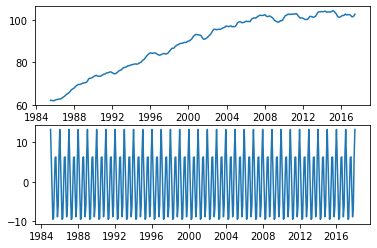

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(ind)

trend = decompose.trend
season = decompose.seasonal
plt.subplot(211)
plt.plot(trend)
plt.subplot(212)
plt.plot(season)

In [65]:
ind_new = ind['IPG2211A2N'] -  ind['IPG2211A2N'].shift(2)

In [67]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ind, seasonal_order=(2,2,1,12))
model_fit = model.fit()

C:\Users\ponra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ponra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ponra\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [68]:
res = model_fit.forecast(24)


In [70]:
res = pd.DataFrame(res)
res.columns=['Predictions']
ts_data_pred = pd.DataFrame(ind)
ts_data_pred = ts_data_pred.append(res)

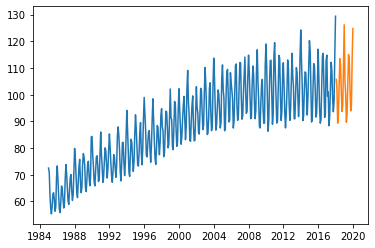

In [71]:
plt.plot(ts_data_pred)